In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [2]:
def limpa_dados_meses(url_data, url_scrapper, meses):
# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1
    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

#Quantidade de meses passados que queremos analisar
    col = [df.columns[0]]
    for i in range(meses):
        col.append(df.columns[-(i+2)])

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[col]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [3]:
url_data = "https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv"

df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df['Unidade da Federação'] = df["Unidade da Federação"].str[3:]
df = df.drop(columns = ['Total'])

colunas = df.mean().index.tolist()
colunas.insert(0, "Unidade da Federação")
df = df[colunas]
df = df.set_index('Unidade da Federação')
df = df /1e6
df = df.sort_values(by = df.columns.max(), ascending = False)
df.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,...,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,...,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,...,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,...,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,...,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84


In [4]:
mensal = df.T
mensal.tail()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Alagoas,Amazonas,Piauí,Mato Grosso,Sergipe,Rondônia,Acre,Roraima,Amapá,Tocantins
2020/Nov,335.08,175.25,126.86,108.85,86.78,86.26,78.90,68.46,56.92,43.04,...,18.60,19.90,18.91,20.51,12.26,9.36,3.28,3.62,2.22,0.53
2020/Dez,330.49,172.51,120.04,111.76,90.42,85.87,70.98,70.33,50.85,44.15,...,17.81,17.77,20.88,19.58,11.45,8.88,3.70,3.45,2.57,0.68
2021/Jan,355.15,174.72,122.12,119.99,94.18,79.96,83.85,71.97,52.08,46.13,...,17.54,21.43,22.69,19.12,12.06,9.27,3.72,3.27,2.80,0.42
2021/Fev,348.83,177.27,132.62,111.80,85.58,81.99,75.56,74.34,53.17,42.74,...,18.53,25.92,19.40,18.35,13.00,7.73,3.54,3.52,2.82,0.32
2021/Mar,392.95,200.47,140.26,130.16,106.84,98.75,83.87,81.38,62.08,45.59,...,22.12,22.03,20.02,19.61,13.32,11.02,4.08,3.99,3.19,1.36


<AxesSubplot:ylabel='São Paulo'>

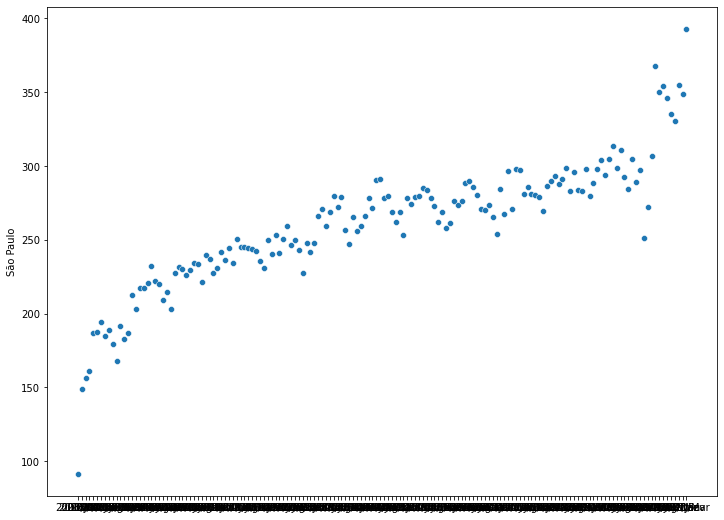

In [5]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'São Paulo'

# Criação da figura 
fig, ax = plt.subplots(figsize = (12,9))
sns.scatterplot(data = data, x = x, y = y)

O eixo X ficou completamente poluido por causa da quantidade de meses que possuimos.

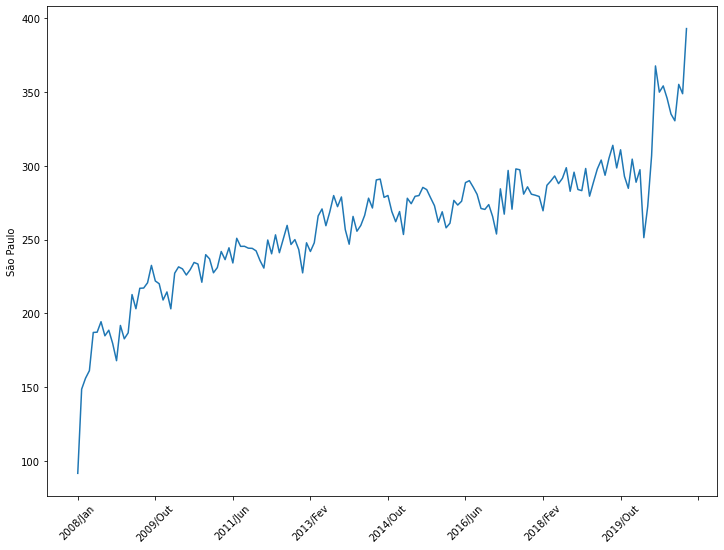

In [6]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'São Paulo'

# Criação da Figura
fig, ax = plt.subplots(figsize = (12,9))
sns.lineplot(data = data, x = x, y = y)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation = 45)
plt.show()

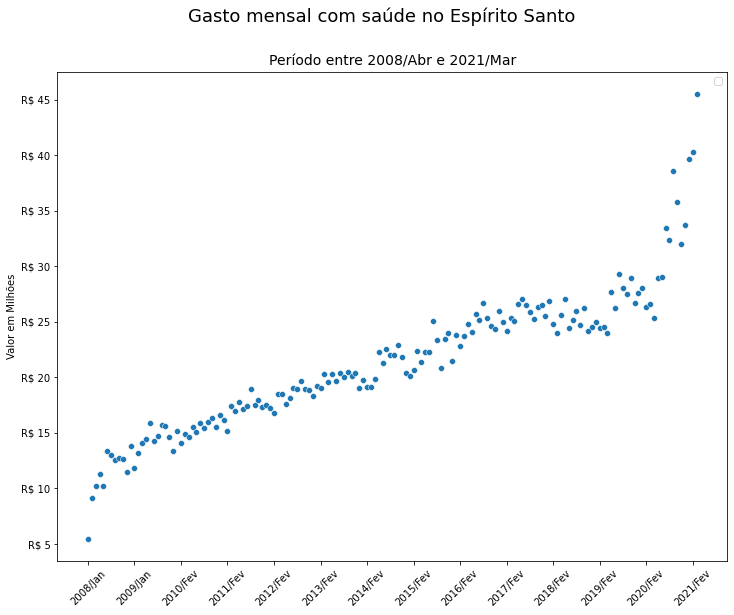

In [7]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'Espírito Santo'

# Criando a figura 
plt.figure(figsize=(12,9))

# Criando o gráfico
ax = sns.scatterplot(data = data, x = x, y = y)

# Configuração dos eixos
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset= 0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.set_xlabel('')
ax.set_ylabel('Valor em Milhões')

# Ajustes do plot
plt.suptitle('Gasto mensal com saúde no '+ y , fontsize = 18)
plt.title('Período entre {} e {}'.format(mensal.index.min(),mensal.index.max()), fontsize = 14)
plt.xticks(rotation = 45)
plt.legend('')
plt.show()

# Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.



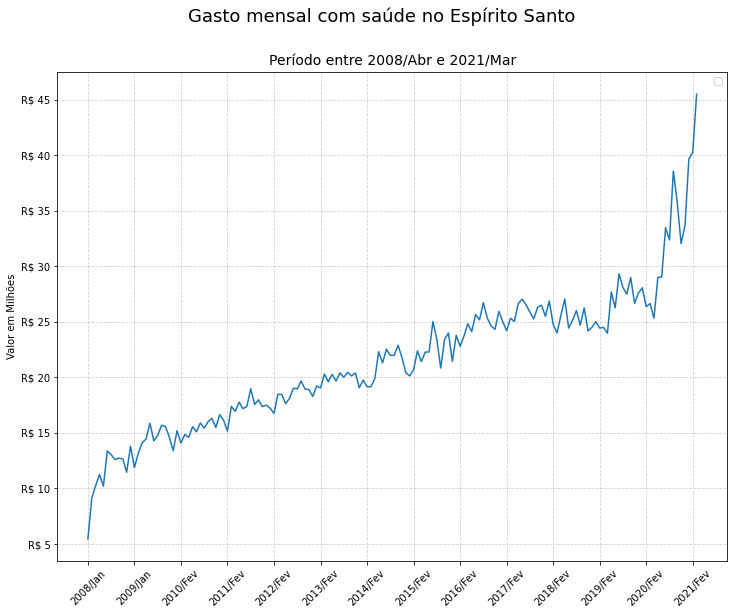

In [8]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'Espírito Santo'

# Criando a figura 
plt.figure(figsize=(12,9))

# Criando o gráfico
ax = sns.lineplot(data = data, x = x, y = y)

# Configuração dos eixos
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset= 0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.set_xlabel('')
ax.set_ylabel('Valor em Milhões')

# Ajustes do plot
plt.suptitle('Gasto mensal com saúde no '+ y , fontsize = 18)
plt.title('Período entre {} e {}'.format(mensal.index.min(),mensal.index.max()), fontsize = 14)
plt.xticks(rotation = 45)
plt.grid(linestyle = '--', alpha = 0.6)
plt.legend('')
plt.show()